# Analyze a human kidney visium data with Giotto

The human kidney visium data can be download from the 10x website: 

In [1]:
library(Giotto)
genv_exists = checkGiottoEnvironment()
if(!genv_exists){
  installGiottoEnvironment()
}
library(ggplot2)

Giotto Suite 3.3.1


 giotto environment found at 
/home/haojiawu/.local/share/r-miniconda/envs/giotto_env/bin/python




In [2]:
results_folder = 'result_visium'
python_path = NULL # alternatively, "/local/python/path/python" if desired.

In [3]:
instrs = createGiottoInstructions(save_dir = results_folder,
                                  save_plot = TRUE,
                                  show_plot = FALSE,
                                  python_path = python_path)


no external python path was provided, but a giotto python environment was found
 and will be used



In [4]:
data_path = 'human_visium/'

visium_kidney = createGiottoVisiumObject(visium_dir = data_path, 
                                         expr_data = 'raw',
                                         png_name = 'tissue_hires_image.png',
                                         
                                         gene_column_index = 2,
                                         instructions = instrs)

A structured visium directory will be used 


png and scalefactors paths are found and automatic alignment for the hires
 image will be attempted


Consider to install these (optional) packages to run all possible Giotto
 commands for spatial analyses: scran MAST tiff trendsceek multinet RTriangle
 FactoMineR

Giotto does not automatically install all these packages as they are not
 absolutely required and this reduces the number of dependencies



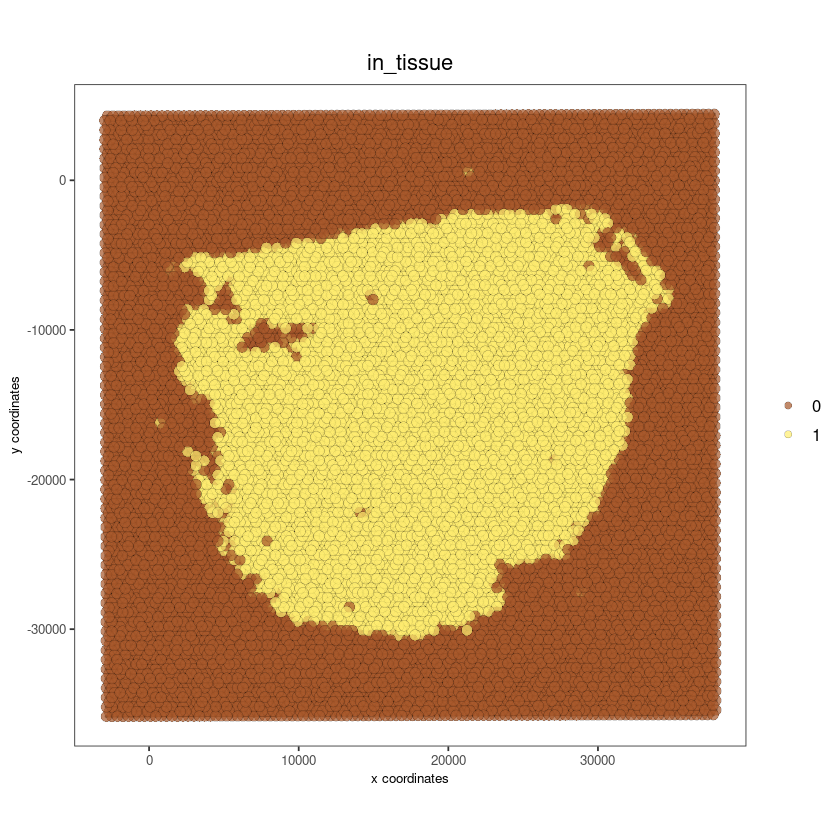

In [5]:
spatPlot(gobject = visium_kidney, 
         cell_color = 'in_tissue', show_image = T, point_alpha = 0.7)

completed 1: preparation 
completed 2: subset expression data 
completed 3: subset spatial locations 
completed 4: subset cell (spatial units) and feature IDs 
completed 5: subset cell metadata 
completed 6: subset feature metadata 
completed 7: subset spatial network(s) 
completed 8: subsetted dimension reductions 
completed 9: subsetted nearest network(s) 
completed 10: subsetted spatial enrichment results 

Feature type:  rna 
Number of cells removed:  1  out of  5936 
Number of feats removed:  72  out of  18984 



first scale feats and then cells



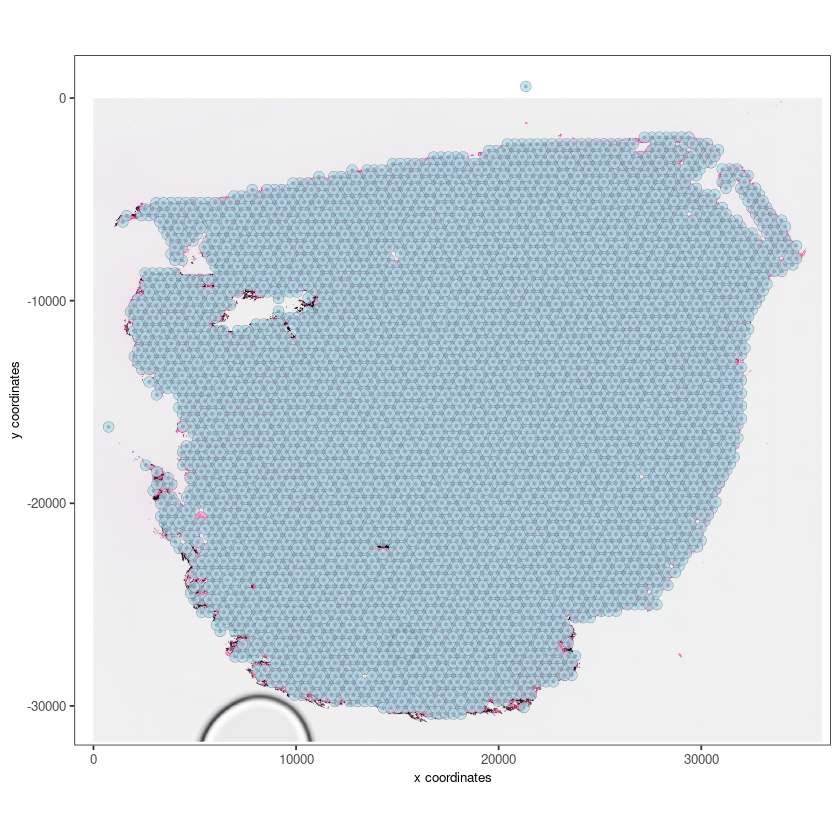

In [6]:
metadata = pDataDT(visium_kidney)
in_tissue_barcodes = metadata[in_tissue == 1]$cell_ID
visium_kidney = subsetGiotto(visium_kidney, cell_ids = in_tissue_barcodes)
visium_kidney <- filterGiotto(gobject = visium_kidney,
                              expression_threshold = 1,
                              feat_det_in_min_cells = 50,
                              min_det_feats_per_cell = 100,
                              expression_values = c('raw'),
                              verbose = T)
visium_kidney <- normalizeGiotto(gobject = visium_kidney, scalefactor = 6000, verbose = T)
visium_kidney <- addStatistics(gobject = visium_kidney)
spatPlot2D(gobject = visium_kidney, show_image = T, point_alpha = 0.7)

In [7]:
visium_kidney <- calculateHVF(gobject = visium_kidney)

return_plot = TRUE and return_gobject = TRUE 

          plot will not be returned to object, but can still be saved with save_plot = TRUE or manually 


"hvf" was found in the feats metadata information and will be used to select
 highly variable features



class of selected matrix:  dgCMatrix 
[1] "finished runPCA_factominer, method == factominer"
PCA with name:  pca  already exists and will be used for the screeplot 


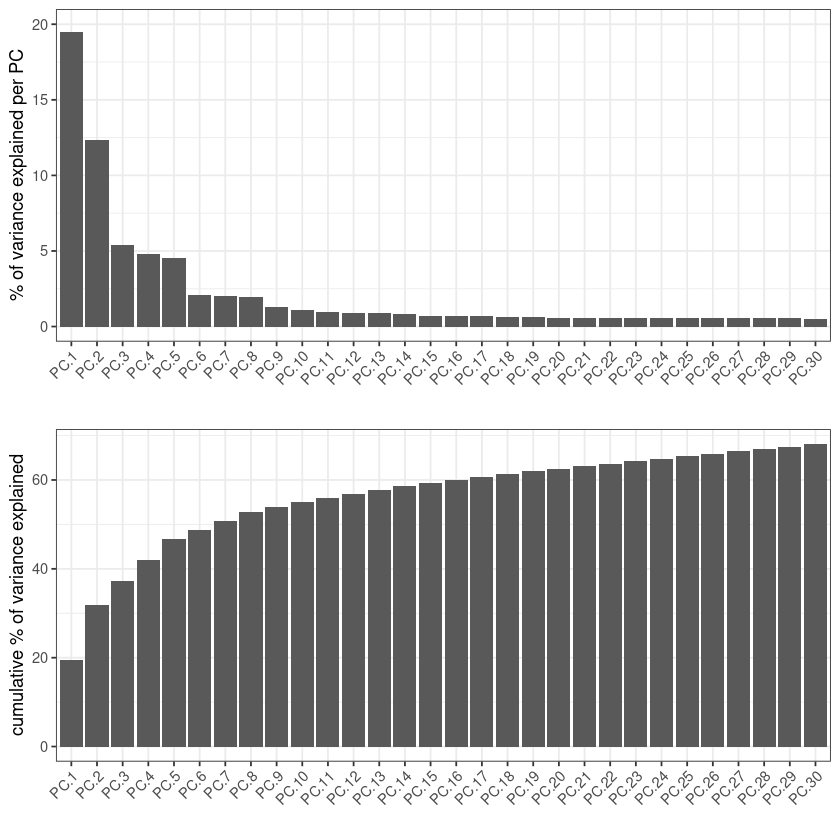

In [8]:
visium_kidney <- runPCA(gobject = visium_kidney)
screePlot(visium_kidney, ncp = 30)

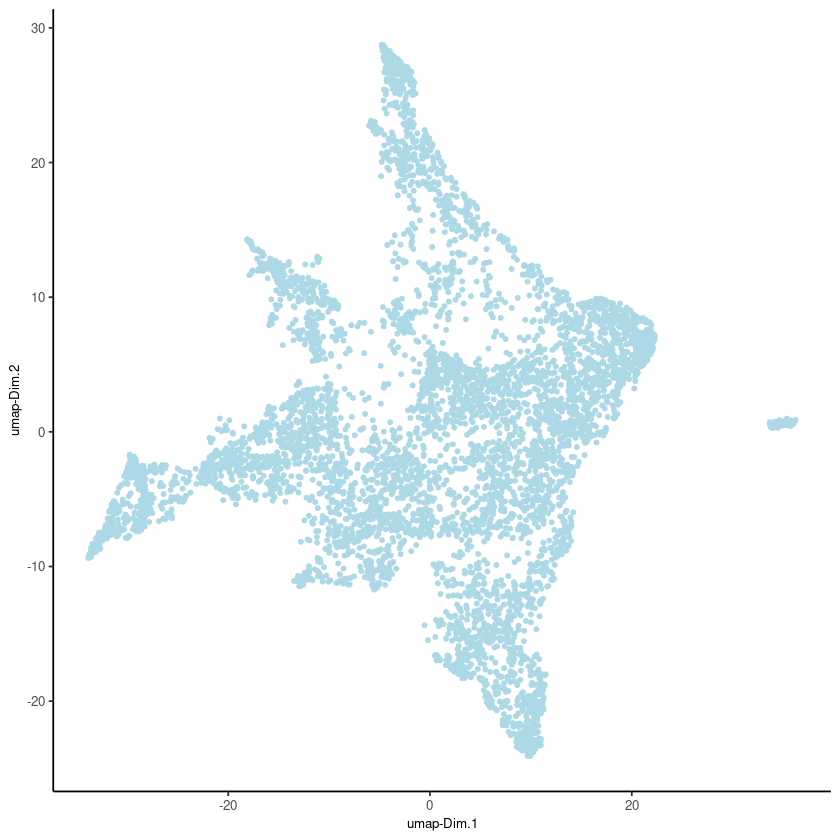

In [9]:
visium_kidney <- runUMAP(visium_kidney, dimensions_to_use = 1:10)
plotUMAP(gobject = visium_kidney)

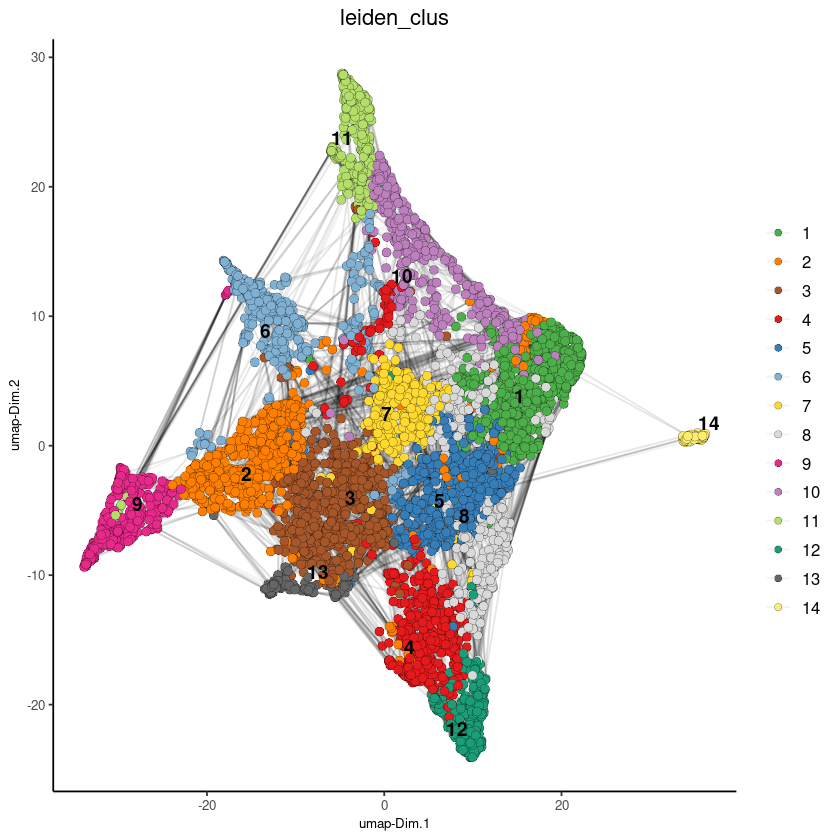

In [10]:
visium_kidney <- createNearestNetwork(gobject = visium_kidney, dimensions_to_use = 1:10, k = 15)
visium_kidney <- doLeidenCluster(gobject = visium_kidney, resolution = 0.4, n_iterations = 1000)
plotUMAP(gobject = visium_kidney, cell_color = 'leiden_clus', show_NN_network = T, point_size = 2.5)

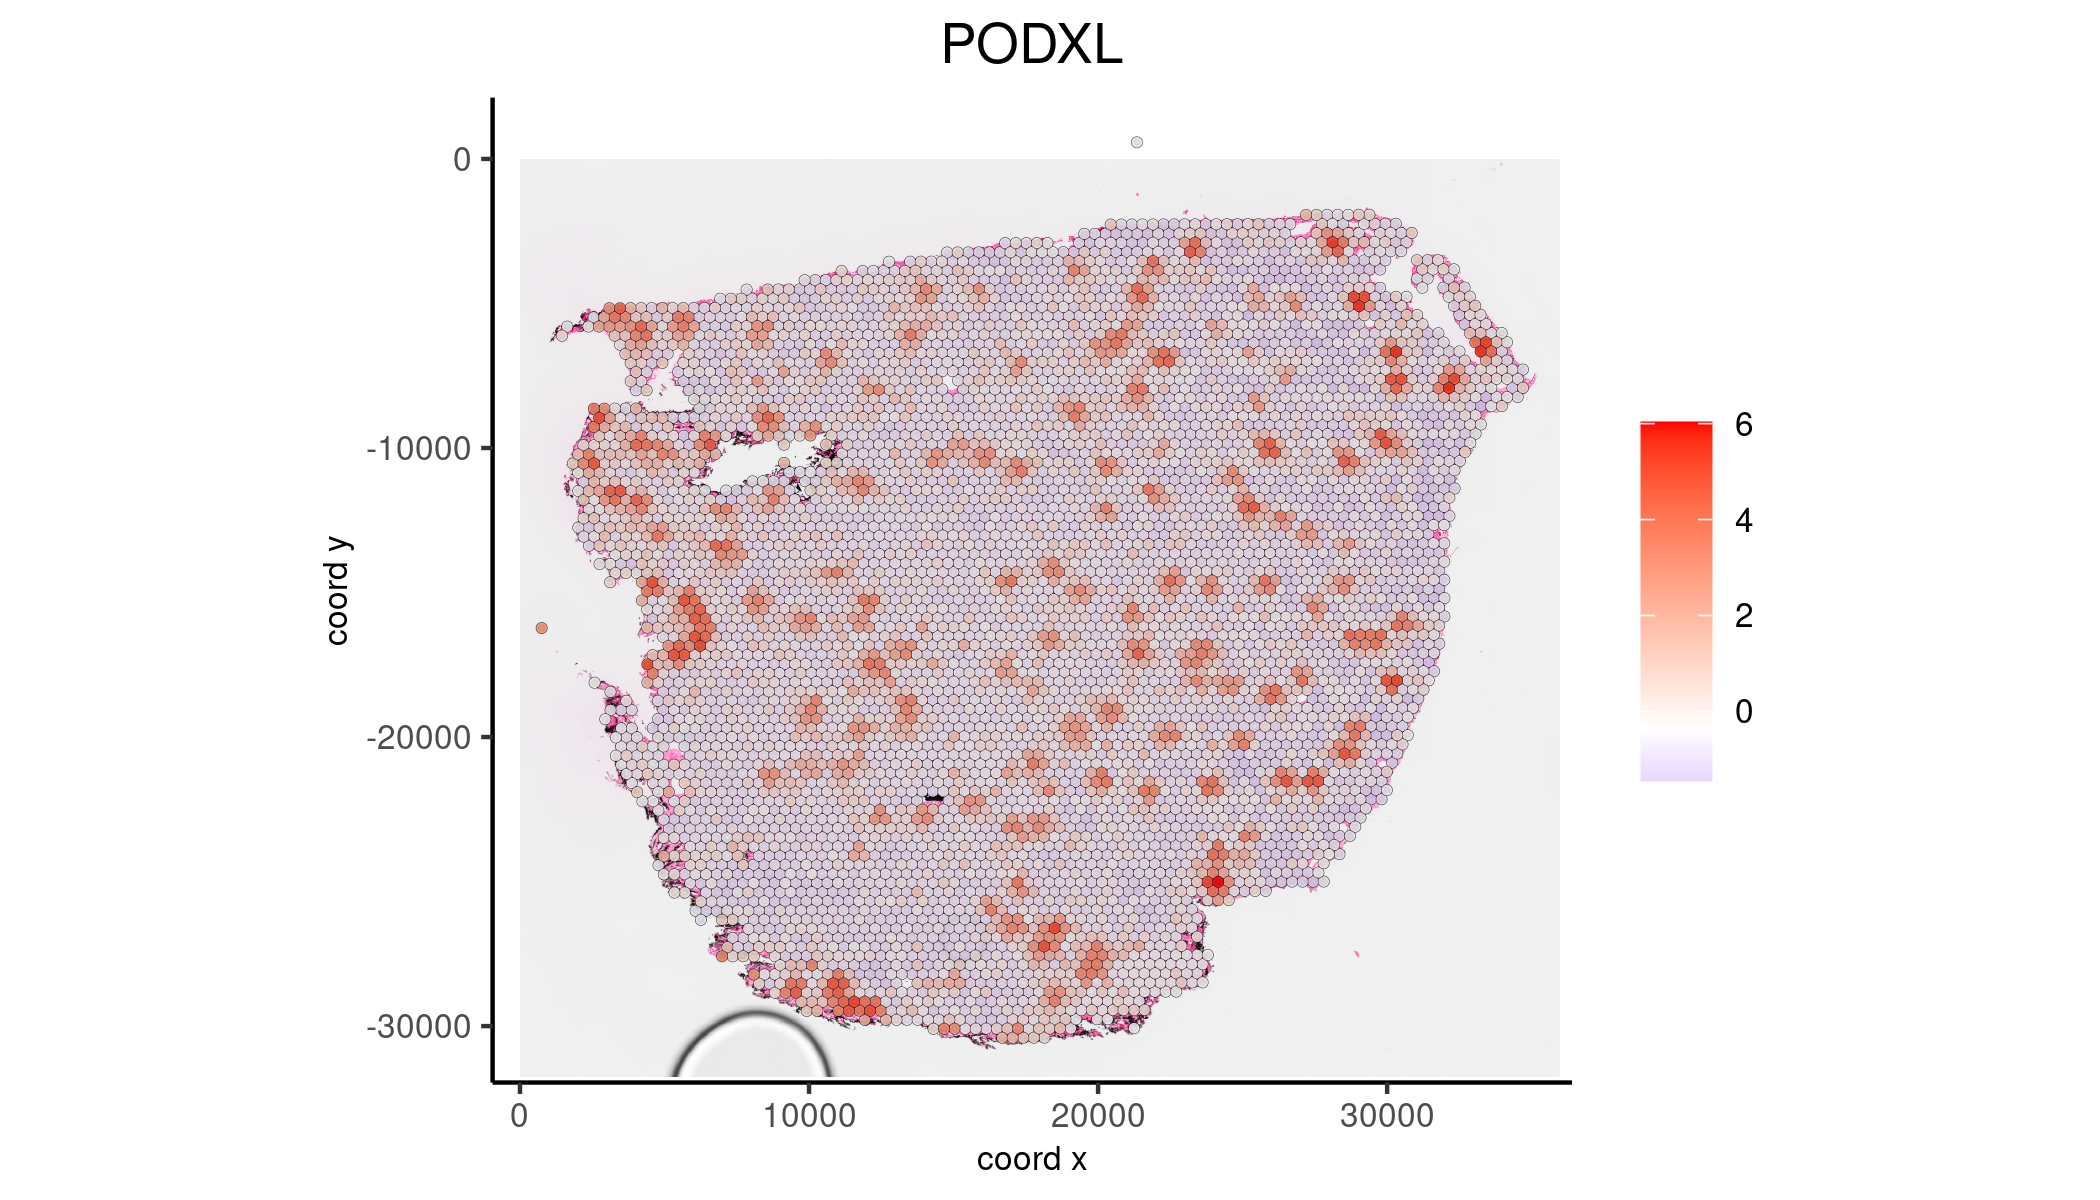

In [20]:
spatFeatPlot2D(visium_kidney, expression_values = 'scaled', show_image = T,
             feats = "PODXL", cow_n_col = 1, 
               point_size = 1.2, point_alpha=0.8)

In [12]:
max(visium_kidney@spatial_locs$cell$raw@coordinates$sdimx)

[1] 34698

In [13]:
min(visium_kidney@spatial_locs$cell$raw@coordinates$sdimy)

[1] -30404

In [14]:
visium_kidney_subset = subsetGiottoLocs(visium_kidney,
                                      y_max = -18700,
                                      y_min = -20000,
                                      x_max = 10440,
                                      x_min = 9300)

In [15]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)
png(file="podxl_visium.png", width=6, height=4, units = "in", res = 300)
spatFeatPlot2D(visium_kidney_subset, expression_values = 'scaled',show_image = T,cell_color_gradient = c('lightyellow1','darkolivegreen1','green4'),
             feats = "PODXL", cow_n_col = 1, point_size = 25, point_alpha=0.6) 
dev.off()

png 
  2

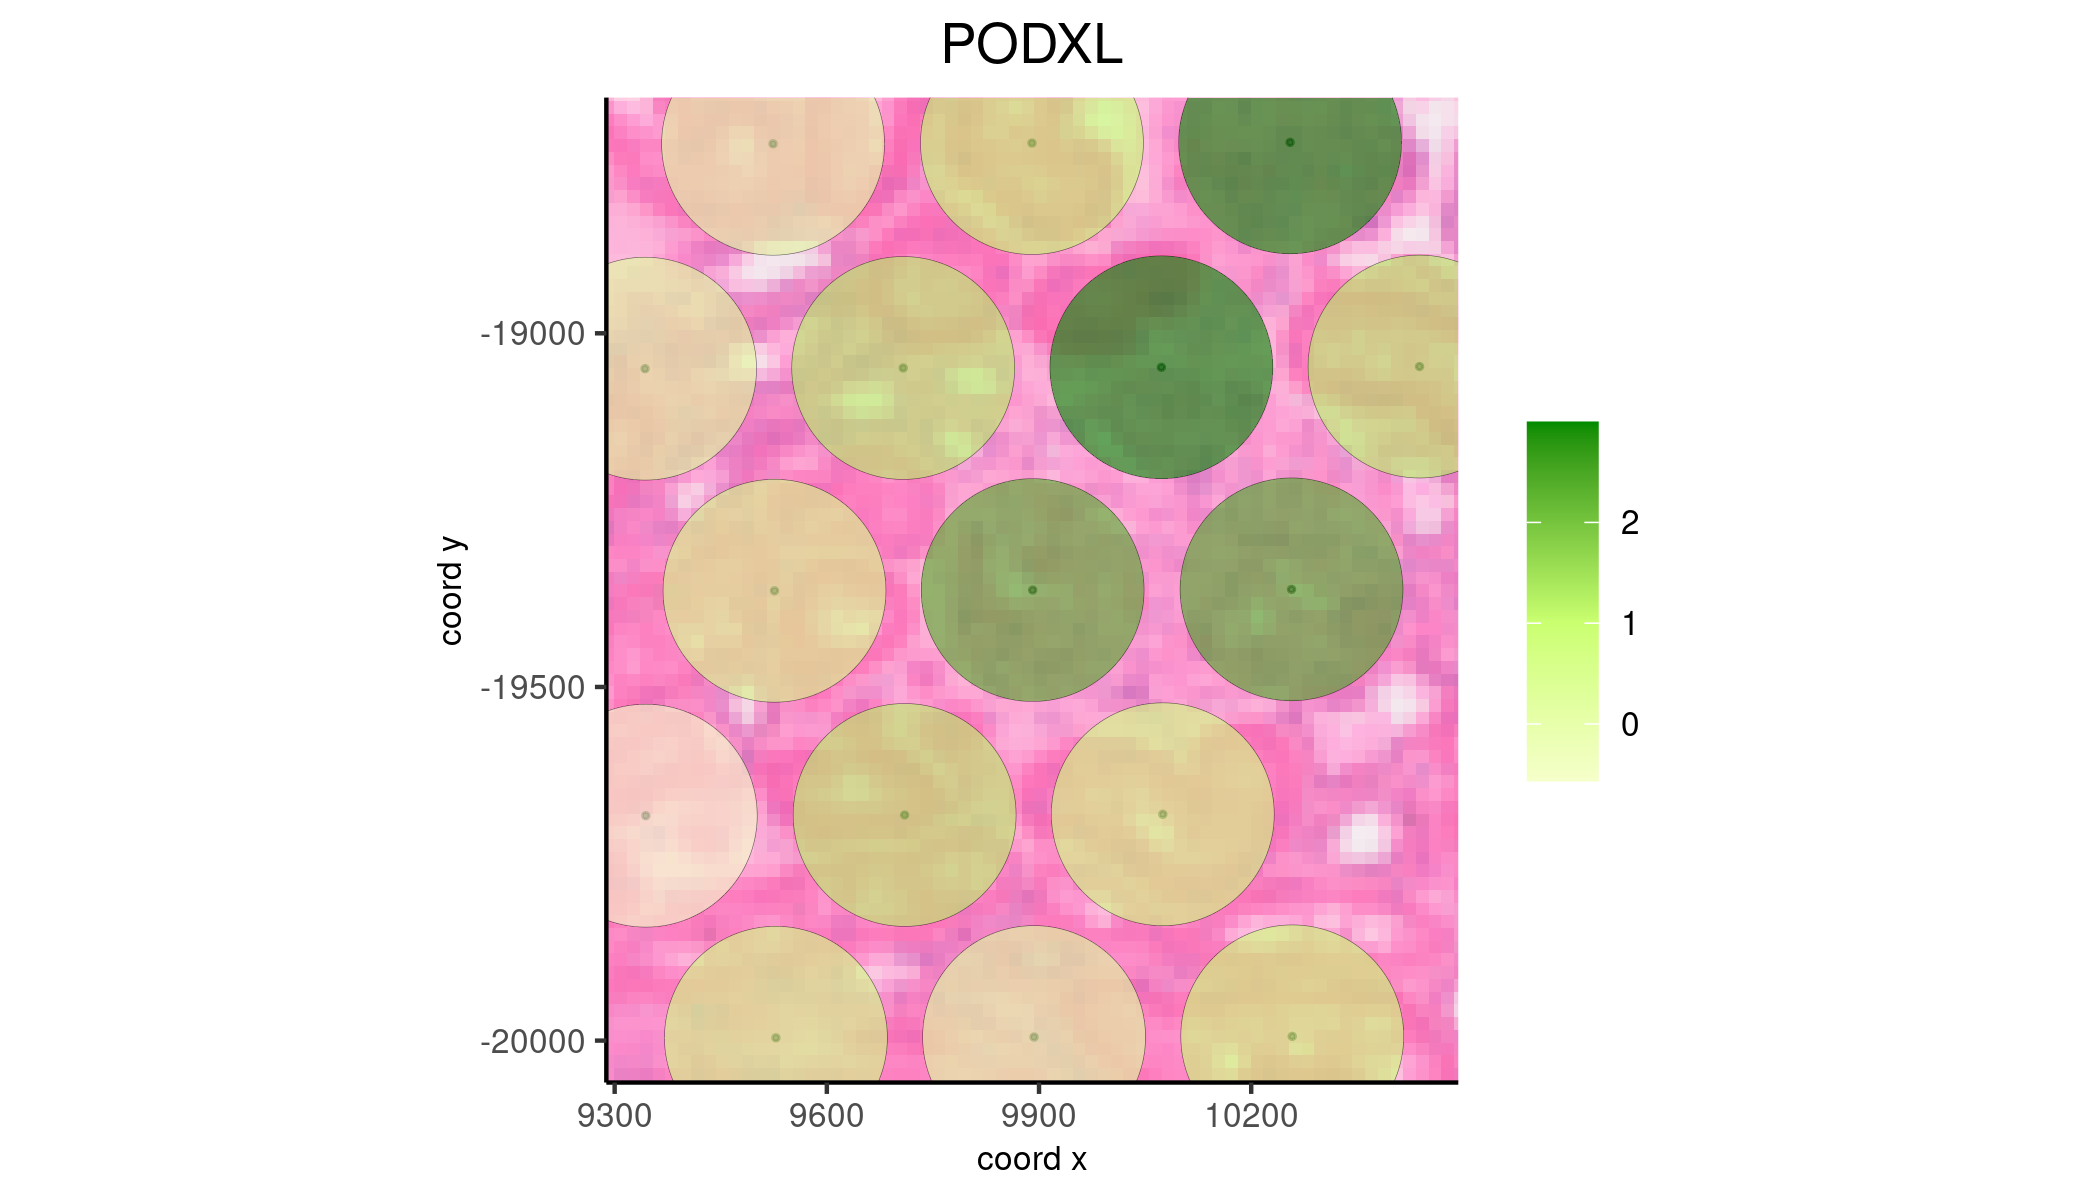

In [17]:
spatFeatPlot2D(visium_kidney_subset, expression_values = 'scaled',show_image = T,cell_color_gradient = c('lightyellow1','darkolivegreen1','green4'),
             feats = "PODXL", cow_n_col = 1, point_size = 25, point_alpha=0.6) 